In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# read datasdet using pandas
tesla_stock_data = pd.read_csv('TSLA_all_supported_frames.csv')

In [84]:
tesla_stock_data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1min
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1min
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1min
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1min
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1min


In [85]:
tesla_stock_data.tail()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame
32352,11/30/2010 0:00,21.94,36.00,21.05,35.330,28315100,Monthly
32353,10/29/2010 0:00,20.69,21.87,20.00,21.840,6547800,Monthly
32354,9/30/2010 0:00,19.62,23.16,19.50,20.405,18045900,Monthly
32355,8/31/2010 0:00,20.50,22.18,17.39,19.480,15038200,Monthly
32356,7/30/2010 0:00,25.00,25.92,14.98,19.940,64575800,Monthly


In [86]:
tesla_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32357 non-null  object 
 1   Open        32357 non-null  float64
 2   High        32357 non-null  float64
 3   Low         32357 non-null  float64
 4   Close       32357 non-null  float64
 5   Volume      32357 non-null  int64  
 6   Frame       32357 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [87]:
tesla_stock_data.describe()

,Open,High,Low,Close,Volume
count,32357.000000,32357.000000,32357.000000,32357.000000,3.235700e+04
mean,283.799256,285.832134,281.361191,283.847299,9.293756e+06
std,113.052536,117.997792,109.205824,113.382841,8.395515e+07
min,16.140000,16.630000,14.980000,15.800000,5.000000e+00
25%,247.100000,247.700000,244.860000,247.140000,8.214000e+03
50%,262.910200,265.000000,262.150000,262.900000,8.816800e+04
75%,323.530000,324.800000,322.100000,323.510000,5.207090e+05
max,2295.120000,2318.490000,2186.520000,2238.750000,3.897499e+09


In [88]:
tesla_stock_data.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
Frame         0
dtype: int64

In [89]:
tesla_stock_data = tesla_stock_data.rename(columns = {'Unnamed: 0':'DateTime'})
tesla_stock_data['DateTime'] = pd.to_datetime(tesla_stock_data['DateTime'])
tesla_stock_data.head()

,DateTime,Open,High,Low,Close,Volume,Frame
0,2024-11-19 19:59:00,344.91,345.00,344.91,344.99,10210,1min
1,2024-11-19 19:58:00,345.04,345.05,344.90,344.99,5771,1min
2,2024-11-19 19:57:00,345.02,345.08,344.81,345.04,5140,1min
3,2024-11-19 19:56:00,345.03,345.04,345.00,345.01,1799,1min
4,2024-11-19 19:55:00,345.00,345.08,345.00,345.00,2259,1min


In [90]:
tesla_stock_data['Day_of_week'] = tesla_stock_data['DateTime'].dt.dayofweek
tesla_stock_data['Month'] = tesla_stock_data['DateTime'].dt.month
tesla_stock_data['Hour'] = tesla_stock_data['DateTime'].dt.hour
tesla_stock_data.tail()

,DateTime,Open,High,Low,Close,Volume,Frame,Day_of_week,Month,Hour
32352,2010-11-30,21.94,36.00,21.05,35.330,28315100,Monthly,1,11,0
32353,2010-10-29,20.69,21.87,20.00,21.840,6547800,Monthly,4,10,0
32354,2010-09-30,19.62,23.16,19.50,20.405,18045900,Monthly,3,9,0
32355,2010-08-31,20.50,22.18,17.39,19.480,15038200,Monthly,1,8,0
32356,2010-07-30,25.00,25.92,14.98,19.940,64575800,Monthly,4,7,0


In [91]:
daily_data = tesla_stock_data[tesla_stock_data['Frame'] == 'Daily']
weekly_data = tesla_stock_data[tesla_stock_data['Frame'] == 'Weekly']
monthly_data = tesla_stock_data[tesla_stock_data['Frame'] == 'Monthly']
print("Daily Data:", daily_data.shape)
print("Weekly Data:", weekly_data.shape)
print("Monthly Data:", monthly_data.shape)

Daily Data: (3625, 10)
Weekly Data: (751, 10)
Monthly Data: (173, 10)


In [92]:
daily_data = daily_data.sort_values(by='DateTime')
daily_data.head()


,DateTime,Open,High,Low,Close,Volume,Frame,Day_of_week,Month,Hour
31432,2010-06-29,19.00,25.0000,17.54,23.89,18766300,Daily,1,6,0
31431,2010-06-30,25.79,30.4192,23.30,23.83,17187100,Daily,2,6,0
31430,2010-07-01,25.00,25.9200,20.27,21.96,8218800,Daily,3,7,0
31429,2010-07-02,23.00,23.1000,18.71,19.20,5139800,Daily,4,7,0
31428,2010-07-06,20.00,20.0000,15.83,16.11,6866900,Daily,1,7,0


In [93]:
weekly_data = weekly_data.sort_values(by='DateTime')
weekly_data.head()

,DateTime,Open,High,Low,Close,Volume,Frame,Day_of_week,Month,Hour
32183,2010-07-09,20.00,20.00,14.98,17.40,25550600,Weekly,4,7,0
32182,2010-07-16,17.95,21.50,16.90,20.64,15438900,Weekly,4,7,0
32181,2010-07-23,21.37,22.25,19.50,21.29,7175700,Weekly,4,7,0
32180,2010-07-30,21.50,21.50,19.55,19.94,3052000,Weekly,4,7,0
32179,2010-08-06,20.50,22.18,19.52,19.59,4399700,Weekly,4,8,0


In [94]:
monthly_data = monthly_data.sort_values(by='DateTime')
monthly_data.head()

,DateTime,Open,High,Low,Close,Volume,Frame,Day_of_week,Month,Hour
32356,2010-07-30,25.00,25.92,14.98,19.940,64575800,Monthly,4,7,0
32355,2010-08-31,20.50,22.18,17.39,19.480,15038200,Monthly,1,8,0
32354,2010-09-30,19.62,23.16,19.50,20.405,18045900,Monthly,3,9,0
32353,2010-10-29,20.69,21.87,20.00,21.840,6547800,Monthly,4,10,0
32352,2010-11-30,21.94,36.00,21.05,35.330,28315100,Monthly,1,11,0


In [95]:
daily_data.to_csv('daily_data.csv', index=False)
weekly_data.to_csv('weekly_data.csv', index=False)
monthly_data.to_csv('monthly_data.csv', index=False)

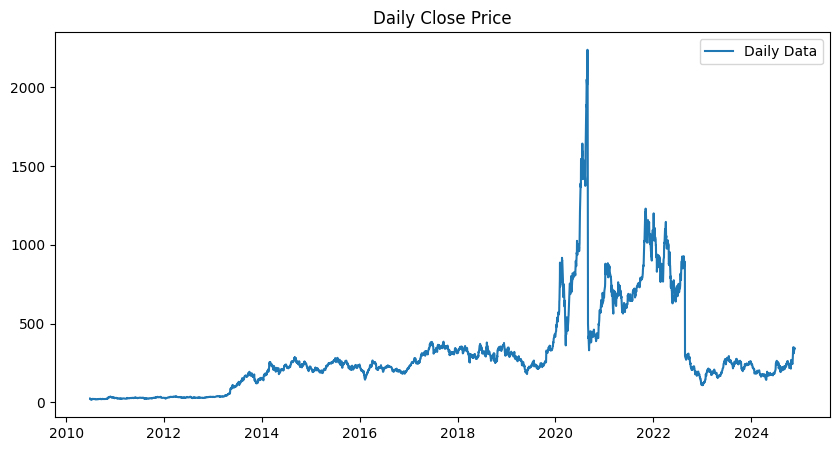

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(daily_data['DateTime'], daily_data['Close'], label='Daily Data')
plt.title('Daily Close Price')
plt.legend()
plt.show()

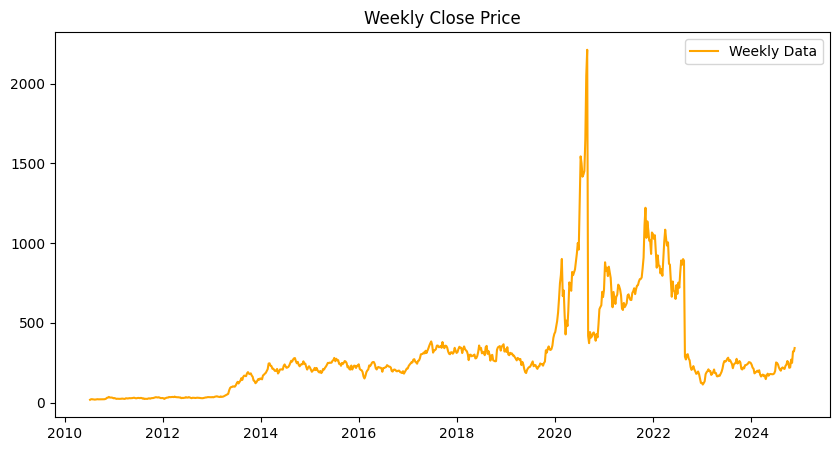

In [97]:

plt.figure(figsize=(10, 5))
plt.plot(weekly_data['DateTime'], weekly_data['Close'], label='Weekly Data', color='orange')
plt.title('Weekly Close Price')
plt.legend()
plt.show()

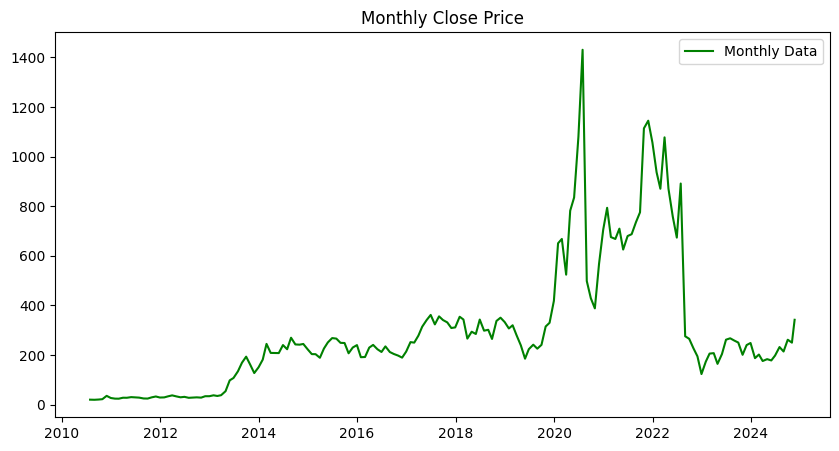

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['DateTime'], monthly_data['Close'], label='Monthly Data', color='green')
plt.title('Monthly Close Price')
plt.legend()
plt.show()

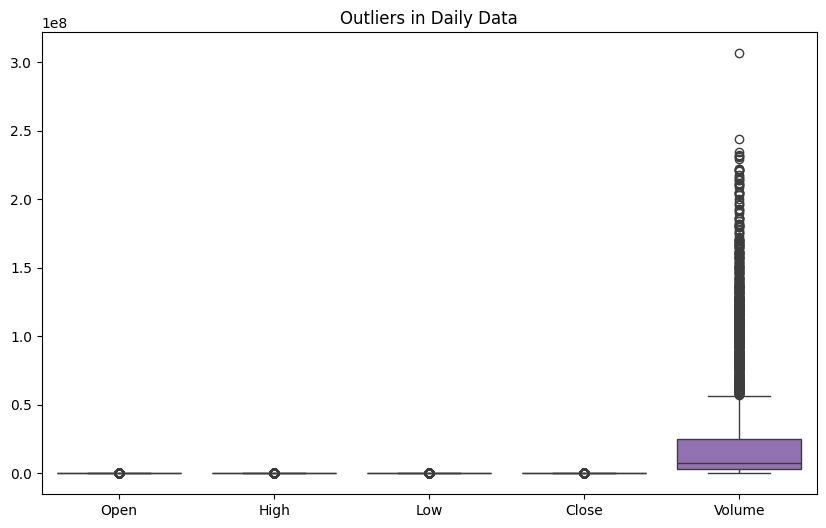

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=daily_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Outliers in Daily Data')
plt.show()

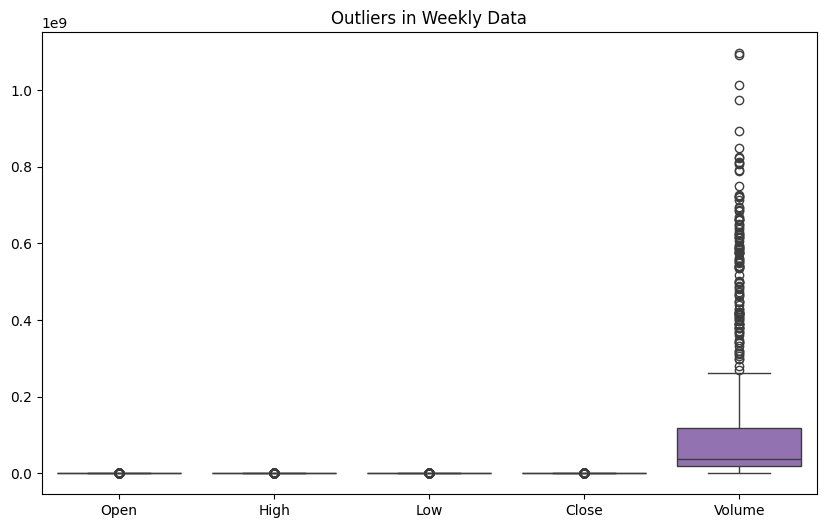

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=weekly_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Outliers in Weekly Data')
plt.show()

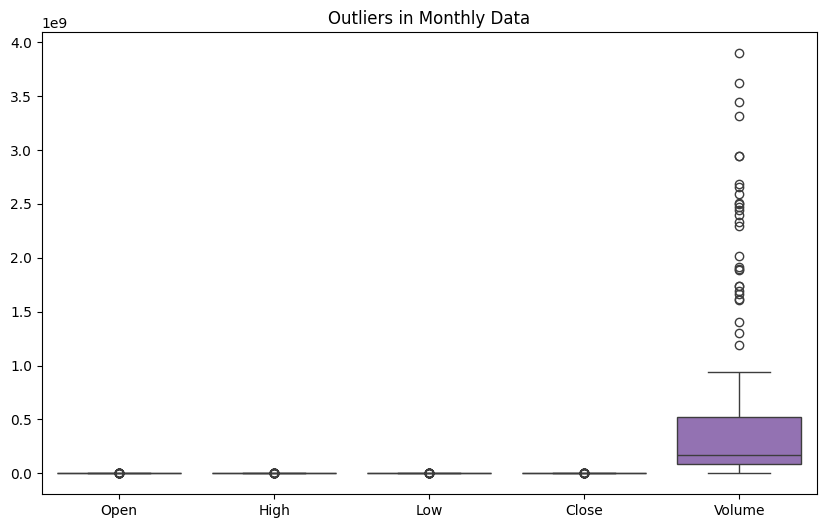

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Outliers in Monthly Data')
plt.show()

In [115]:
from sklearn.preprocessing import RobustScaler

def apply_robust_scaler(df, column):
    scaler = RobustScaler()
    df[f"{column}_scaled"] = scaler.fit_transform(df[[column]])
    return df

# تطبيق RobustScaler على جميع الفريمات
daily_data = apply_robust_scaler(daily_data, 'Volume_log')
weekly_data = apply_robust_scaler(weekly_data, 'Volume_log')
monthly_data = apply_robust_scaler(monthly_data, 'Volume_log')


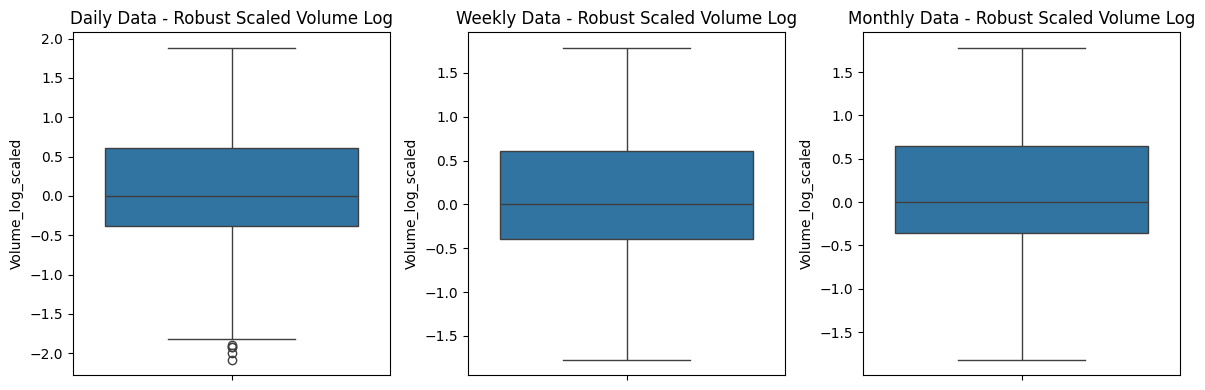

In [116]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=daily_data['Volume_log_scaled'])
plt.title('Daily Data - Robust Scaled Volume Log')

plt.subplot(1, 3, 2)
sns.boxplot(data=weekly_data['Volume_log_scaled'])
plt.title('Weekly Data - Robust Scaled Volume Log')

plt.subplot(1, 3, 3)
sns.boxplot(data=monthly_data['Volume_log_scaled'])
plt.title('Monthly Data - Robust Scaled Volume Log')

plt.tight_layout()
plt.show()
